In [17]:
from __future__ import annotations

import re
import unicodedata
from pathlib import Path
from typing import Optional, Tuple

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import xagg as xa

In [2]:
# US Census cartographic boundary counties (2020, 1:500k).
# The Census Bureau hosts this zip directly. :contentReference[oaicite:3]{index=3}
#COUNTY_SHP_ZIP_URL = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_500k.zip"

# US Census cartographic boundary counties (2019, 1:500k).
COUNTY_SHP_ZIP_URL = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip"

# US Census cartographic boundary counties (2018, 1:500k).
#COUNTY_SHP_ZIP_URL = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip"

In [3]:
text = """Acadia, Louisiana
Adair, Iowa
Adams, Iowa
Adams, Mississippi
Adams, Nebraska
Adams, Ohio
Addison, Vermont
Adjuntas, Puerto Rico
Aguas Buenas, Puerto Rico
Aibonito, Puerto Rico
Alexander, Illinois
Allamakee, Iowa
Allegany, Maryland
Allegany, New York
Allen, Kansas
Androscoggin, Maine
Appanoose, Iowa
Aransas, Texas
Arecibo, Puerto Rico
Ascension, Louisiana
Ashland, Ohio
Ashley, Arkansas
Ashtabula, Ohio
Athens, Ohio
Atlantic, New Jersey
Audubon, Iowa
Avery, North Carolina
Avoyelles, Louisiana
Ballard, Kentucky
Barbour, West Virginia
Barceloneta, Puerto Rico
Barry, Missouri
Bartholomew, Indiana
Barton, Kansas
Bath, Kentucky
Bath, Virginia
Bay, Florida
Beauregard, Louisiana
Beaver, Pennsylvania
Bell, Kentucky
Belmont, Ohio
Benewah, Idaho
Benson, North Dakota
Black Hawk, Iowa
Blanco, Texas
Bledsoe, Tennessee
Bollinger, Missouri
Bonner, Idaho
Boone, Iowa
Boone, West Virginia
Boundary, Idaho
Boyd, Kentucky
Boyd, Nebraska
Bradford, Pennsylvania
Braxton, West Virginia
Brazoria, Texas
Breathitt, Kentucky
Bremer, Iowa
Brewster, Texas
Brooke, West Virginia
Broome, New York
Brown, Ohio
Brown, Texas
Buchanan, Iowa
Buchanan, Virginia
Buffalo, Nebraska
Buffalo, Wisconsin
Buncombe, North Carolina
Burleson, Texas
Burnet, Texas
Butler, Iowa
Butler, Kansas
Butler, Missouri
Butte, California
Caguas, Puerto Rico
Calcasieu, Louisiana
Caldwell, Texas
Caledonia, Vermont
Calhoun, Iowa
Calhoun, West Virginia
Cameron, Louisiana
Cameron, Texas
Canovanas, Puerto Rico
Cape Girardeau, Missouri
Cape May, New Jersey
Carroll, Illinois
Carroll, Indiana
Carroll, Iowa
Carter, Kentucky
Carter, Missouri
Cass, Iowa
Cass, Nebraska
Cass, North Dakota
Catano, Puerto Rico
Catron, New Mexico
Cattaraugus, New York
Cayey, Puerto Rico
Cedar, Iowa
Ceiba, Puerto Rico
Cerro Gordo, Iowa
Chambers, Texas
Chautauqua, New York
Chemung, New York
Chenango, New York
Cherokee, Iowa
Chickasaw, Iowa
Chicot, Arkansas
Chittenden, Vermont
Christian, Kentucky
Citrus, Florida
Clarion, Pennsylvania
Clarke, Iowa
Clarke, Mississippi
Clay, Arkansas
Clay, Indiana
Clay, Minnesota
Clay, West Virginia
Clayton, Iowa
Clinton, New York
Coffee, Alabama
Colfax, Nebraska
Columbia, Wisconsin
Comal, Texas
Comerio, Puerto Rico
Concordia, Louisiana
Cooke, Texas
Coos, New Hampshire
Cortland, New York
Coshocton, Ohio
Crawford, Indiana
Crawford, Iowa
Crawford, Ohio
Crawford, Pennsylvania
Crawford, Wisconsin
Crittenden, Kentucky
Crockett, Tennessee
Cumberland, Maine
Cuming, Nebraska
Dallas, Iowa
Dare, North Carolina
Davidson, Tennessee
Daviess, Indiana
Daviess, Kentucky
Davis, Iowa
Decatur, Iowa
Delaware, Iowa
Delaware, New York
Des Moines, Iowa
Dewitt, Texas
Dickenson, Virginia
Dixie, Florida
Doddridge, West Virginia
Dodge, Minnesota
Dubuque, Iowa
Dunklin, Missouri
Dyer, Tennessee
East Baton Rouge, Louisiana
East Carroll, Louisiana
El Paso, Texas
Emmet, Iowa
Erie, Ohio
Erie, Pennsylvania
Escambia, Florida
Essex, New York
Essex, Vermont
Evangeline, Louisiana
Fayette, Iowa
Fayette, West Virginia
Fillmore, Minnesota
Floyd, Iowa
Floyd, Kentucky
Forrest, Mississippi
Fort Bend, Texas
Franklin, Florida
Franklin, Illinois
Franklin, Iowa
Franklin, Louisiana
Franklin, Maine
Franklin, Massachusetts
Franklin, Mississippi
Franklin, New York
Franklin, Vermont
Fremont, Iowa
Gallatin, Illinois
Gallia, Ohio
Galveston, Texas
Garfield, Utah
Geneva, Alabama
Gibson, Indiana
Gibson, Tennessee
Giles, Virginia
Gilmer, Georgia
Gilmer, West Virginia
Gogebic, Michigan
Gonzales, Texas
Grafton, New Hampshire
Grand Forks, North Dakota
Grand, Utah
Grant, Wisconsin
Green, Wisconsin
Greenbrier, West Virginia
Greene, Indiana
Greene, Iowa
Greene, New York
Greene, Pennsylvania
Greene, Virginia
Greenup, Kentucky
Grenada, Mississippi
Grimes, Texas
Grundy, Illinois
Grundy, Iowa
Guadalupe, Texas
Gulf, Florida
Guthrie, Iowa
Halifax, Virginia
Hamilton, Indiana
Hamilton, Iowa
Hancock, Iowa
Hancock, Mississippi
Hancock, Ohio
Hancock, West Virginia
Hardin, Illinois
Hardin, Iowa
Hardin, Kentucky
Hardin, Texas
Harper, Kansas
Harris, Texas
Harrison, Iowa
Harrison, Mississippi
Harrison, Ohio
Hayes, Nebraska
Hays, Texas
Henderson, Kentucky
Hinds, Mississippi
Hocking, Ohio
Holmes, Florida
Holmes, Mississippi
Holmes, Ohio
Houston, Minnesota
Howard, Iowa
Howard, Nebraska
Howell, Missouri
Humboldt, Iowa
Hunterdon, New Jersey
Huron, Ohio
Iberia, Louisiana
Inyo, California
Iowa, Iowa
Issaquena, Mississippi
Jackson, Florida
Jackson, Illinois
Jackson, Indiana
Jackson, Iowa
Jackson, Mississippi
Jackson, Ohio
Jackson, West Virginia
Jasper, Iowa
Jasper, Mississippi
Jasper, Texas
Jefferson Davis, Louisiana
Jefferson, Alabama
Jefferson, Kentucky
Jefferson, Louisiana
Jefferson, Mississippi
Jefferson, Ohio
Jefferson, Pennsylvania
Jefferson, Texas
Jefferson, Washington
Jefferson, Wisconsin
Jo Daviess, Illinois
Johnson, Illinois
Johnson, Indiana
Johnson, Iowa
Johnson, Kentucky
Jones, Iowa
Jones, Mississippi
Kanawha, West Virginia
Karnes, Texas
Kenai Peninsula, Alaska
Kennebec, Maine
Keokuk, Iowa
Kittson, Minnesota
Knox, Indiana
Knox, Kentucky
Knox, Maine
Knox, Ohio
Kossuth, Iowa
La Paz, Arizona
Lackawanna, Pennsylvania
Laclede, Missouri
Lafayette, Louisiana
Lafayette, Wisconsin
Lafourche, Louisiana
Lake And Peninsula, Alaska
Lake, Ohio
Lake, Tennessee
Lamar, Mississippi
Lamoille, Vermont
Larimer, Colorado
Lauderdale, Mississippi
Lawrence, Arkansas
Lawrence, Indiana
Lawrence, Kentucky
Lawrence, Mississippi
Lawrence, Ohio
Lawrence, Tennessee
Leake, Mississippi
Lee, Florida
Lee, Iowa
Lee, Kentucky
Lewis, Kentucky
Lewis, Washington
Lewis, West Virginia
Liberty, Texas
Lincoln, Maine
Lincoln, Mississippi
Lincoln, Missouri
Lincoln, Nevada
Lincoln, New Mexico
Lincoln, West Virginia
Linn, Iowa
Livingston, Kentucky
Livingston, Louisiana
Livingston, New York
Llano, Texas
Logan, West Virginia
Lorain, Ohio
Louisa, Iowa
Lucas, Iowa
Luzerne, Pennsylvania
Lyon, Iowa
Lyon, Nevada
Macomb, Michigan
Madison, Iowa
Madison, Louisiana
Madison, Mississippi
Madison, North Carolina
Madison, Texas
Magoffin, Kentucky
Mahaska, Iowa
Marin, California
Marion, Iowa
Marion, Mississippi
Marion, West Virginia
Mariposa, California
Marshall, Iowa
Marshall, Minnesota
Marshall, West Virginia
Martin, Indiana
Martin, Kentucky
Mason, Washington
Massac, Illinois
Matanuska-Susitna, Alaska
Matanuska-Susitna, Alaska
Mathews, Virginia
Mccracken, Kentucky
Mcdonald, Missouri
Mcdowell, West Virginia
Mclean, Kentucky
Medina, Ohio
Medina, Texas
Meigs, Ohio
Menifee, Kentucky
Mercer, Ohio
Mercer, West Virginia
Miami-Dade, Florida
Miami-Dade, Florida
Middlesex, New Jersey
Milwaukee, Wisconsin
Mingo, West Virginia
Mississippi, Missouri
Mitchell, Iowa
Mitchell, Kansas
Monmouth, New Jersey
Mono, California
Monona, Iowa
Monroe, Iowa
Monroe, Ohio
Montgomery, Arkansas
Montgomery, Iowa
Montgomery, Kansas
Montgomery, Texas
Morehouse, Louisiana
Morgan, Colorado
Morgan, Indiana
Morgan, Kentucky
Morgan, Ohio
Mower, Minnesota
Nantucket, Massachusetts
Navarro, Texas
Neosho, Kansas
New Madrid, Missouri
Newton, Arkansas
Newton, Mississippi
Newton, Texas
Nicholas, West Virginia
Noble, Ohio
Nome, Alaska
Norman, Minnesota
North Slope, Alaska
Northumberland, Virginia
Nueces, Texas
Ocean, New Jersey
Ohio, West Virginia
Okanogan, Washington
Olmsted, Minnesota
Oneida, New York
Orange, Texas
Orange, Vermont
Orleans, Louisiana
Orleans, Vermont
Osborne, Kansas
Otsego, New York
Ottawa, Ohio
Ouachita, Louisiana
Owen, Indiana
Owen, Kentucky
Owsley, Kentucky
Oxford, Maine
Pacific, Washington
Page, Iowa
Palo Alto, Iowa
Parke, Indiana
Pembina, North Dakota
Pendleton, Kentucky
Perry, Illinois
Perry, Missouri
Perry, Ohio
Pike, Indiana
Pike, Kentucky
Pike, Ohio
Plaquemines, Louisiana
Platte, Nebraska
Pleasants, West Virginia
Pocahontas, Iowa
Pocahontas, West Virginia
Polk, Iowa
Polk, Minnesota
Polk, Texas
Pope, Illinois
Posey, Indiana
Powell, Kentucky
Poweshiek, Iowa
Pulaski, Illinois
Putnam, Tennessee
Putnam, West Virginia
Raleigh, West Virginia
Ramsey, North Dakota
Randolph, Arkansas
Randolph, West Virginia
Rankin, Mississippi
Rapides, Louisiana
Real, Texas
Rice, Kansas
Richland, Louisiana
Richland, North Dakota
Richland, Ohio
Richland, Wisconsin
Ringgold, Iowa
Ripley, Missouri
Ritchie, West Virginia
Roane, West Virginia
Rockbridge, Virginia
Rooks, Kansas
Roseau, Minnesota
Rutland, Vermont
Sac, Iowa
Sagadahoc, Maine
Saline, Nebraska
San Bernardino, California
San Jacinto, Texas
Santa Cruz, Arizona
Sauk, Wisconsin
Saunders, Nebraska
Schoharie, New York
Schuyler, New York
Scioto, Ohio
Scott, Arkansas
Scott, Mississippi
Scott, Missouri
Shannon, Missouri
Sharkey, Mississippi
Shelby, Tennessee
Shenandoah, Virginia
Shoshone, Idaho
Sierra, New Mexico
Smith, Kansas
Somerset, Maine
Somerset, New Jersey
Sonoma, California
Southeast Fairbanks, Alaska
St. Bernard, Louisiana
St. Mary, Louisiana
St. Bernard, Louisiana
St. John The Baptist, Louisiana
St. Landry, Louisiana
St. Martin, Louisiana
St. Mary, Louisiana
St. Tammany, Louisiana
Stark, Ohio
Starr, Texas
Steuben, New York
Stoddard, Missouri
Storey, Nevada
Story, Iowa
Sullivan, Indiana
Sullivan, New York
Summit, Ohio
Susquehanna, Pennsylvania
Sussex, Delaware
Swain, North Carolina
Switzerland, Indiana
Tama, Iowa
Tangipahoa, Louisiana
Taylor, Florida
Taylor, Iowa
Taylor, West Virginia
Tazewell, Virginia
Tensas, Louisiana
Terrebonne, Louisiana
Thayer, Nebraska
Thurston, Nebraska
Tillamook, Oregon
Tioga, New York
Tipton, Tennessee
Toa Baja, Puerto Rico
Tompkins, New York
Trempealeau, Wisconsin
Trimble, Kentucky
Trumbull, Ohio
Tunica, Mississippi
Tuscarawas, Ohio
Tyler, Texas
Tyler, West Virginia
Union, Illinois
Union, Iowa
Union, Kentucky
Utuado, Puerto Rico
Uvalde, Texas
Val Verde, Texas
Valdez-Cordova, Alaska
Van Buren, Iowa
Vega Alta, Puerto Rico
Venango, Pennsylvania
Vermilion, Louisiana
Vermillion, Indiana
Vernon, Louisiana
Vernon, Wisconsin
Vigo, Indiana
Vinton, Ohio
Wabasha, Minnesota
Wakulla, Florida
Waldo, Maine
Walker, Texas
Walsh, North Dakota
Walton, Florida
Wapello, Iowa
Warren, Indiana
Warren, Iowa
Warren, Mississippi
Warren, New York
Washington, Florida
Washington, Iowa
Washington, Louisiana
Washington, Mississippi
Washington, New York
Washington, Ohio
Washington, Texas
Washington, Utah
Washington, Vermont
Washoe, Nevada
Watauga, North Carolina
Waukesha, Wisconsin
Wayne, Iowa
Wayne, Michigan
Wayne, Missouri
Wayne, Pennsylvania
Wayne, Utah
Wayne, West Virginia
Webster, Iowa
Webster, Missouri
Webster, West Virginia
Weld, Colorado
West Carroll, Louisiana
Wetzel, West Virginia
White, Illinois
Wilkin, Minnesota
Willacy, Texas
Wilson, Kansas
Wilson, Tennessee
Wilson, Texas
Windsor, Vermont
Winnebago, Iowa
Winneshiek, Iowa
Winona, Minnesota
Wirt, West Virginia
Worth, Iowa
Wright, Iowa
Wyoming, Pennsylvania
Wyoming, West Virginia
Yates, New York
Yazoo, Mississippi
York, Maine
Yukon-Koyukuk, Alaska"""

lines = [ln.strip() for ln in text.splitlines() if ln.strip()]

# Split on the LAST comma to be safe
pairs = [tuple(part.strip() for part in ln.rsplit(",", 1)) for ln in lines]

counties = [c for c, s in pairs]
states   = [s for c, s in pairs]

# If you want to see them as Python literals:
#print("counties =", repr(counties))
#print("states   =", repr(states))

In [4]:
# Minimal state name -> USPS mapping (50 + DC). Add territories if you need them.
STATE_NAME_TO_ABBR = {
    "alabama": "AL", "alaska": "AK", "arizona": "AZ", "arkansas": "AR", "california": "CA",
    "colorado": "CO", "connecticut": "CT", "delaware": "DE", "florida": "FL", "georgia": "GA",
    "hawaii": "HI", "idaho": "ID", "illinois": "IL", "indiana": "IN", "iowa": "IA",
    "kansas": "KS", "kentucky": "KY", "louisiana": "LA", "maine": "ME", "maryland": "MD",
    "massachusetts": "MA", "michigan": "MI", "minnesota": "MN", "mississippi": "MS", "missouri": "MO",
    "montana": "MT", "nebraska": "NE", "nevada": "NV", "new hampshire": "NH", "new jersey": "NJ",
    "new mexico": "NM", "new york": "NY", "north carolina": "NC", "north dakota": "ND", "ohio": "OH",
    "oklahoma": "OK", "oregon": "OR", "pennsylvania": "PA", "rhode island": "RI",
    "south carolina": "SC", "south dakota": "SD", "tennessee": "TN", "texas": "TX", "utah": "UT",
    "vermont": "VT", "virginia": "VA", "washington": "WA", "west virginia": "WV",
    "wisconsin": "WI", "wyoming": "WY", "district of columbia": "DC",
    "puerto rico": "PR",
}

NA_BBOX = dict(
    minlon=-170.0,
    maxlon=-10.0,
    minlat=5.0,
    maxlat=85.0,
)

# Optional: aliases to improve matching to Census names
COUNTY_ALIASES = {
    # PR municipalities (accent issues)
    ("PR", "canovanas"): "canovanas",  # will match after accent-strip on polygon side
    ("PR", "catano"): "catano",
    ("PR", "comerio"): "comerio",
    # Historical Alaska entity (not in 2020 polygons)
    ("AK", "valdez-cordova"): None,  # force a clear error / special handling
}

STATEFP_TO_ABBR = {
    "01":"AL","02":"AK","04":"AZ","05":"AR","06":"CA","08":"CO","09":"CT","10":"DE","11":"DC","12":"FL","13":"GA",
    "15":"HI","16":"ID","17":"IL","18":"IN","19":"IA","20":"KS","21":"KY","22":"LA","23":"ME","24":"MD","25":"MA",
    "26":"MI","27":"MN","28":"MS","29":"MO","30":"MT","31":"NE","32":"NV","33":"NH","34":"NJ","35":"NM","36":"NY",
    "37":"NC","38":"ND","39":"OH","40":"OK","41":"OR","42":"PA","44":"RI","45":"SC","46":"SD","47":"TN","48":"TX",
    "49":"UT","50":"VT","51":"VA","53":"WA","54":"WV","55":"WI","56":"WY",
    "60":"AS","66":"GU","69":"MP","72":"PR","78":"VI",
}

In [5]:
def _strip_accents(s: str) -> str:
    # Converts "Cataño" -> "Catano", "Comerío" -> "Comerio"
    return "".join(
        ch for ch in unicodedata.normalize("NFKD", s)
        if not unicodedata.combining(ch)
    )

def _norm_county(c: str, state_abbr: str | None = None) -> str:
    s = str(c).strip()
    s = _strip_accents(s).lower()

    # Normalize punctuation/hyphens consistently
    s = re.sub(r"[‐-–—]", "-", s)          # normalize hyphen variants
    s = re.sub(r"[^\w\s\-\.']", " ", s)    # keep word chars, space, hyphen, dot, apostrophe
    s = re.sub(r"\s+", " ", s).strip()

    # Remove suffixes
    s = re.sub(r"\b(county|parish|borough|census area|municipality|city and borough)\b", "", s).strip()
    s = re.sub(r"\s+", " ", s).strip()

    # Apply aliases if we know the state
    if state_abbr is not None:
        key = (state_abbr.upper(), s)
        if key in COUNTY_ALIASES:
            mapped = COUNTY_ALIASES[key]
            if mapped is None:
                # Keep as-is so it will fail later with an informative message
                return s
            return mapped

    return s

def _norm_state(s: str) -> str:
    s0 = str(s).strip()
    # If already USPS-style
    if len(s0) == 2:
        return s0.upper()
    key = s0.lower()
    if key not in STATE_NAME_TO_ABBR:
        raise ValueError(f"Unrecognized state: {s!r}. Expected USPS abbr or a known name.")
    return STATE_NAME_TO_ABBR[key]

def load_county_list_from_arrays(states: list[str], counties: list[str]) -> pd.DataFrame:
    """
    states[i] corresponds to counties[i]
    Returns a DataFrame with join_key used to subset Census county polygons.
    """
    if len(states) != len(counties):
        raise ValueError(f"states and counties must be same length. Got {len(states)} vs {len(counties)}.")

    df = pd.DataFrame({"state": states, "county": counties})
    df["state_abbr"] = df["state"].map(_norm_state)
    df["county_norm"] = df["county"].map(_norm_county)
    df["join_key"] = df["state_abbr"].str.upper() + "__" + df["county_norm"]
    return df

def load_county_list(csv_path: str | Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    # Flexible column handling
    cols = {c.lower(): c for c in df.columns}
    if "state" not in cols or "county" not in cols:
        raise ValueError("CSV must contain columns named 'state' and 'county' (case-insensitive).")

    df = df.rename(columns={cols["state"]: "state", cols["county"]: "county"})
    df["state_abbr"] = df["state"].map(_norm_state)
    df["county_norm"] = df["county"].map(_norm_county)
    df["join_key"] = df["state_abbr"].str.upper() + "__" + df["county_norm"]
    return df

def load_county_polygons(allowed_state_abbr: set[str] | None = None) -> gpd.GeoDataFrame:
    """
    Load US county polygons (Census cartographic boundary file) and normalize keys.

    If allowed_state_abbr is provided, polygons are filtered to only those USPS codes
    before additional processing (faster + avoids irrelevant territories).
    """
    gdf = gpd.read_file(COUNTY_SHP_ZIP_URL)

    needed = {"NAME", "GEOID", "geometry"}
    missing = needed - set(gdf.columns)
    if missing:
        raise RuntimeError(
            f"Expected fields {sorted(needed)}; missing {sorted(missing)}. Columns: {list(gdf.columns)}"
        )

    # State abbreviation: prefer STUSPS if present, otherwise derive from STATEFP.
    if "STUSPS" in gdf.columns:
        gdf = gdf.rename(columns={"STUSPS": "state_abbr"})
        gdf["state_abbr"] = gdf["state_abbr"].astype(str).str.upper().str.strip()
    elif "STATEFP" in gdf.columns:
        gdf["STATEFP"] = gdf["STATEFP"].astype(str).str.zfill(2)
        gdf["state_abbr"] = gdf["STATEFP"].map(STATEFP_TO_ABBR)
        if gdf["state_abbr"].isna().any():
            bad = sorted(gdf.loc[gdf["state_abbr"].isna(), "STATEFP"].unique().tolist())
            raise RuntimeError(f"Unmapped STATEFP codes encountered: {bad}")
    else:
        raise RuntimeError(
            f"Neither STUSPS nor STATEFP is present, cannot identify state. Columns: {list(gdf.columns)}"
        )

    # OPTION B: Filter early to only states/territories you actually need.
    if allowed_state_abbr is not None:
        allowed_state_abbr = {s.upper() for s in allowed_state_abbr}
        gdf = gdf[gdf["state_abbr"].isin(allowed_state_abbr)].copy()

    gdf = gdf.rename(columns={"NAME": "county_name", "GEOID": "geoid"})

    # Ensure lat/lon CRS for xagg overlay
    if gdf.crs is None:
        gdf = gdf.set_crs("EPSG:4269", allow_override=True)
    gdf = gdf.to_crs("EPSG:4326")

    # Normalize
    gdf["county_norm"] = [
        _norm_county(nm, st) for nm, st in zip(gdf["county_name"], gdf["state_abbr"])
    ]
    gdf["join_key"] = gdf["state_abbr"].str.upper() + "__" + gdf["county_norm"]

    return gdf

def subset_counties(gdf_all: gpd.GeoDataFrame, df_list: pd.DataFrame) -> gpd.GeoDataFrame:
    keys = set(df_list["join_key"].unique())
    gdf = gdf_all[gdf_all["join_key"].isin(keys)].copy()

    # Basic integrity checks
    missing = keys - set(gdf["join_key"].unique())
    if missing:
        # Do not silently proceed; surface which rows did not match.
        sample = sorted(list(missing))[:20]
        raise ValueError(
            f"{len(missing)} counties from your list did not match Census polygons. "
            f"Sample unmatched join_keys: {sample}"
        )

    # Add a stable output label
    gdf["county_state"] = gdf["county_name"] + ", " + gdf["state_abbr"]
    # Compute county area for optional volume calc (use an equal-area projection)
    gdf_area = gdf.to_crs("EPSG:6933")  # equal-area (global)
    gdf["area_m2"] = gdf_area.geometry.area
    return gdf

def open_era5_tp(
    nc_glob: str,
    var: str = "tp",
    bbox: dict | None = None,   # e.g. {"minlon": -170, "maxlon": -10, "minlat": 5, "maxlat": 85}
    chunks: dict | None = None,
) -> xr.Dataset:
    """
    Open ERA5 total precipitation and optionally subset to a lat/lon bounding box at read time.

    bbox expects keys: minlon, maxlon, minlat, maxlat (in degrees).
    Handles:
      - latitude/longitude -> lat/lon rename
      - lon 0..360 -> -180..180 conversion
      - descending latitude ordering
    """
    if chunks is None:
        chunks = {"time": 240}

    def _preprocess(ds: xr.Dataset) -> xr.Dataset:
        # 1) Keep only the variable to reduce IO
        if var in ds.data_vars:
            ds = ds[[var]]
        elif var in ds.variables:
            ds = ds[[var]]
        else:
            raise KeyError(f"Variable {var!r} not found in file. Available: {list(ds.data_vars)}")

        # 2) Standardize coordinate names
        coord_map = {}
        if "latitude" in ds.coords and "lat" not in ds.coords:
            coord_map["latitude"] = "lat"
        if "longitude" in ds.coords and "lon" not in ds.coords:
            coord_map["longitude"] = "lon"
        if coord_map:
            ds = ds.rename(coord_map)

        if "lat" not in ds.coords or "lon" not in ds.coords:
            raise KeyError(f"Expected lat/lon coordinates after rename. Coords: {list(ds.coords)}")

        # 3) Normalize lon to [-180, 180) if needed, and sort for slicing
        lon = ds["lon"]
        if float(lon.max()) > 180.0:
            lon_new = ((lon + 180) % 360) - 180
            ds = ds.assign_coords(lon=lon_new).sortby("lon")

        # 4) Optional spatial subset
        if bbox is not None:
            minlon = float(bbox["minlon"])
            maxlon = float(bbox["maxlon"])
            minlat = float(bbox["minlat"])
            maxlat = float(bbox["maxlat"])

            lat = ds["lat"]
            # ERA5 lat is often descending
            if float(lat[0]) > float(lat[-1]):
                ds = ds.sel(lat=slice(maxlat, minlat))
            else:
                ds = ds.sel(lat=slice(minlat, maxlat))

            # Assumes bbox does not cross the dateline (true for typical North America bbox)
            ds = ds.sel(lon=slice(minlon, maxlon))

        return ds

    ds = xr.open_mfdataset(
        nc_glob,
        combine="by_coords",
        parallel=True,
        chunks=chunks,
        engine="netcdf4",
        preprocess=_preprocess,
    )

    # Subset to 1995–2020 inclusive
    ds = ds.sel(time=slice("1995-01-01", "2020-12-31T23:59:59"))
    return ds

def monthly_mean_accum_mday_to_total_mmmonth(ds: xr.Dataset, var: str = "TP") -> xr.Dataset:
    """
    For ERA5 monthly mean atmospheric surface forecast (accumulated) style products
    (e.g., UCAR RDA ds633.1), interpret tp as m/day and convert to monthly total mm/month.
    """
    da = ds[var]  # m (effectively m/day for this product)
    mm_per_day = da * 1000.0

    days = xr.DataArray(
        da["time"].dt.days_in_month,
        coords={"time": da["time"]},
        dims=("time",),
    )

    mm_per_month = mm_per_day * days
    mm_per_month.attrs["units"] = "mm/month"
    mm_per_month.attrs["long_name"] = "Total precipitation (monthly total)"
    return mm_per_month.to_dataset(name="precip_mm")

def to_monthly_precip_mm(ds_tp: xr.Dataset, var: str = "tp") -> xr.Dataset:
    da = ds_tp[var]

    # Convert m -> mm
    da_mm = da * 1000.0

    # Detect if data are already (approximately) monthly
    # (If already monthly sums, you can skip resampling; we resample only if sub-monthly.)
    time = pd.DatetimeIndex(da_mm["time"].values)
    if len(time) < 2:
        raise ValueError("Not enough timesteps to infer frequency.")
    median_step_hours = np.median(np.diff(time).astype("timedelta64[h]").astype(int))

    if median_step_hours < 24 * 7:
        # Sub-monthly (e.g., hourly): monthly sum of increments
        da_mon = da_mm.resample(time="MS").sum()
    else:
        # Already coarse (monthly-ish): assume values already represent monthly totals in mm
        da_mon = da_mm

    return da_mon.to_dataset(name="precip_mm")

def build_or_load_weightmap(ds_grid_template, gdf, weightmap_path: str):
    """
    weightmap_path should be a directory path (xagg writes a folder via to_file()).
    """
    p = Path(weightmap_path)

    if p.exists():
        # Try the common loaders across xagg versions
        for loader_name in ("read_wm", "load_wm"):
            if hasattr(xa, loader_name):
                return getattr(xa, loader_name)(str(p))
        raise AttributeError(
            "Could not find a weightmap loader in this xagg version. "
            "Tried xa.read_wm and xa.load_wm. Please check your xagg version/API."
        )

    wm = xa.pixel_overlaps(ds_grid_template, gdf)
    p.parent.mkdir(parents=True, exist_ok=True)
    wm.to_file(str(p))
    return wm

def aggregate_to_counties(ds_monthly: xr.Dataset, wm) -> pd.DataFrame:
    # Area-weighted aggregation. :contentReference[oaicite:7]{index=7}
    agg = xa.aggregate(ds_monthly, wm)

    # Convert to a tidy DataFrame
    df = agg.to_dataframe(loc_dim="poly_idx").reset_index()

    # xagg carries polygon attributes through as columns (e.g., geoid, county_name, state_abbr, area_m2)
    # Make output columns explicit
    keep_cols = [c for c in df.columns if c in {"time", "precip_mm", "geoid", "county_name", "state_abbr", "county_state", "area_m2"}]
    df = df[keep_cols].copy()

    # Optional: precipitation volume (m^3) = (mm/1000) * area_m2
    if "area_m2" in df.columns:
        df["precip_m3"] = (df["precip_mm"] / 1000.0) * df["area_m2"]

    return df

def bbox_from_gdf(gdf, buffer_deg: float = 1.0) -> dict:
    minx, miny, maxx, maxy = gdf.to_crs("EPSG:4326").total_bounds  # lon/lat
    return {
        "minlon": float(minx - buffer_deg),
        "maxlon": float(maxx + buffer_deg),
        "minlat": float(miny - buffer_deg),
        "maxlat": float(maxy + buffer_deg),
    }

def open_gpcp_precip(
    nc_glob: str,
    var: str = "precip",
    bbox: dict | None = None,     # {"minlon":..., "maxlon":..., "minlat":..., "maxlat":...}
    chunks: dict | None = None,
) -> xr.Dataset:
    if chunks is None:
        chunks = {"time": 240}  # monthly files; adjust as desired

    def _preprocess(ds: xr.Dataset) -> xr.Dataset:
        # Keep only precip to reduce IO
        if var not in ds.data_vars:
            raise KeyError(f"Variable {var!r} not found. Available: {list(ds.data_vars)}")
        ds = ds[[var]]

        # Standardize coord names
        coord_map = {}
        if "latitude" in ds.coords and "lat" not in ds.coords:
            coord_map["latitude"] = "lat"
        if "longitude" in ds.coords and "lon" not in ds.coords:
            coord_map["longitude"] = "lon"
        if coord_map:
            ds = ds.rename(coord_map)

        if "lat" not in ds.coords or "lon" not in ds.coords:
            raise KeyError(f"Expected lat/lon coordinates after rename. Coords: {list(ds.coords)}")

        # Handle missing values (GPCP uses missing_value=-9999)
        da = ds[var]
        mv = da.attrs.get("missing_value", None)
        if mv is not None:
            ds[var] = da.where(da != mv)

        # Convert lon 0..360 -> -180..180 and sort
        lon = ds["lon"]
        if float(lon.max()) > 180.0:
            lon_new = ((lon + 180) % 360) - 180
            ds = ds.assign_coords(lon=lon_new).sortby("lon")

        # Optional bbox subset
        if bbox is not None:
            minlon, maxlon = float(bbox["minlon"]), float(bbox["maxlon"])
            minlat, maxlat = float(bbox["minlat"]), float(bbox["maxlat"])

            lat = ds["lat"]
            # latitude can be ascending or descending; handle both
            if float(lat[0]) > float(lat[-1]):
                ds = ds.sel(lat=slice(maxlat, minlat))
            else:
                ds = ds.sel(lat=slice(minlat, maxlat))

            ds = ds.sel(lon=slice(minlon, maxlon))

        return ds

    ds = xr.open_mfdataset(
        nc_glob,
        combine="by_coords",
        parallel=True,
        chunks=chunks,
        engine="netcdf4",
        preprocess=_preprocess,
    )

    # analysis window
    ds = ds.sel(time=slice("1995-01-01", "2020-12-31"))
    return ds

def gpcp_mmday_to_mmmonth(ds: xr.Dataset, var: str = "precip") -> xr.Dataset:
    da = ds[var]  # mm/day

    days = xr.DataArray(
        da["time"].dt.days_in_month,
        coords={"time": da["time"]},
        dims=("time",),
    )

    mm_month = da * days
    mm_month.attrs["units"] = "mm/month"
    mm_month.attrs["long_name"] = "Monthly total precipitation (from GPCP mm/day)"
    return mm_month.to_dataset(name="precip_mm")

## ERA5 processing

In [6]:
# 0) Build df_list (from your arrays) and polygons
df_list = load_county_list_from_arrays(states, counties)
gdf_all = load_county_polygons(allowed_state_abbr=set(df_list["state_abbr"].unique()))
gdf     = subset_counties(gdf_all, df_list)

In [8]:
# 1) Open ds633.1 monthly precip with bbox subset
bbox = bbox_from_gdf(gdf, buffer_deg=1.0)  # or NA_BBOX

In [9]:
bbox

{'minlon': -172.846922,
 'maxlon': -64.57484769096307,
 'minlat': 17.036926038969717,
 'maxlat': 72.365162}

In [10]:
ds_tp = open_era5_tp(
    '/glade/campaign/collections/rda/data/d633001/e5.moda.fc.sfc.accumu/*/e5.moda.fc.sfc.accumu.128_228_tp.ll025sc.*_*.nc', 
    var="TP", 
    bbox=bbox
)

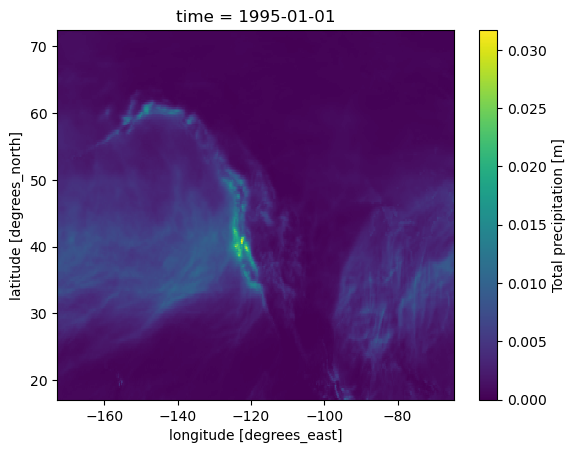

In [13]:
ds_tp.isel(time=0)['TP'].plot()

In [14]:
# 2) Convert monthly mean (mm/day) -> monthly total (mm/month)
ds_mon = monthly_mean_accum_mday_to_total_mmmonth(ds_tp, var="TP")

In [15]:
# 3) Weightmap from SAME grid
ds_template = ds_mon.isel(time=0)[["precip_mm"]]
wm = build_or_load_weightmap(
    ds_template, 
    gdf, 
    "/glade/derecho/scratch/molina/wm_cb2019_era5tp_ds633_bbox_v1",
)

creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output polygons...
success!


/glade/work/molina/conda-envs/county-regrid/lib/python3.14/site-packages/xagg/export.py:17: UserWarning: export_weightmap() is still an experimental feature. use with care.
  warnings.warn('export_weightmap() is still an experimental feature. use with care.')


In [16]:
# 4) Aggregate
df_out = aggregate_to_counties(ds_mon, wm)

adjusting grid... (this may happen because only a subset of pixels were used for aggregation for efficiency - i.e. [subset_bbox=True] in xa.pixel_overlaps())
grid adjustment successful
aggregating precip_mm...
all variables aggregated to polygons!


In [17]:
# 5) Save
df_out.to_csv(
    "/glade/derecho/scratch/molina/county_monthly_era5tp_mmmonth_1995_2020.csv", 
    index=False
)

<Axes: >

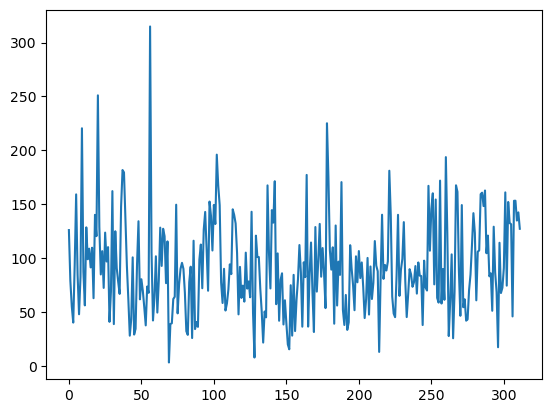

In [19]:
df_out[df_out['county_name']=='Halifax']['precip_mm'].plot()

In [18]:
df_out

,time,geoid,county_name,state_abbr,county_state,area_m2,precip_mm,precip_m3
0,1995-01-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,125.930570,2.706244e+08
1,1995-02-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,78.937497,1.696364e+08
2,1995-03-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,55.083646,1.183746e+08
3,1995-04-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,40.058145,8.608482e+07
4,1995-05-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,93.408844,2.007353e+08
...,...,...,...,...,...,...,...,...
187195,2020-08-01,19145,Page,IA,"Page, IA",1.386849e+09,20.292950,2.814325e+07
187196,2020-09-01,19145,Page,IA,"Page, IA",1.386849e+09,60.723048,8.421368e+07
187197,2020-10-01,19145,Page,IA,"Page, IA",1.386849e+09,45.866141,6.360940e+07
187198,2020-11-01,19145,Page,IA,"Page, IA",1.386849e+09,63.796624,8.847626e+07


## NOAA GPCP processing

In [6]:
# Build df_list (from your arrays) and polygons
df_list = load_county_list_from_arrays(states, counties)
gdf_all = load_county_polygons(allowed_state_abbr=set(df_list["state_abbr"].unique()))
gdf     = subset_counties(gdf_all, df_list)

# bbox choice: NA_BBOX is fine, but for efficiency use your polygon bbox with a coarse-grid buffer
bbox_gpcp = bbox_from_gdf(gdf, buffer_deg=5.0)  # 2.5° grid: 5° buffer = ~2 grid cells

ds_gpcp = open_gpcp_precip(
    "/glade/campaign/collections/rda/data/d728006/gpcp_v2.3_monthly/gpcp_v02r03_monthly_d*.nc",
    var="precip",
    bbox=bbox_gpcp
)

print(ds_gpcp)

<xarray.Dataset> Size: 2MB
Dimensions:  (time: 312, lat: 26, lon: 47)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1995-01-01 1995-02-01 ... 2020-12-01
  * lat      (lat) float32 104B 13.75 16.25 18.75 21.25 ... 71.25 73.75 76.25
  * lon      (lon) float32 188B -176.2 -173.8 -171.2 ... -66.25 -63.75 -61.25
Data variables:
    precip   (time, lat, lon) float32 2MB dask.array<chunksize=(1, 26, 47), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                CF-1.6, ACDD 1.3
    title:                      Global Precipitation Climatatology Project (G...
    source:                     oc.197901.sg
    references:                 Huffman et al. 1997, http://dx.doi.org/10.117...
    history:                    1) �R`�, Dr. Jian-Jian Wang, U of Maryland,...
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0, NOAA ...
    ...                         ...
    metadata_link:              gov.noaa.ncdc:C00979
    product_version:            v23rB1
    platfo

In [7]:
ds_gpcp_mon = gpcp_mmday_to_mmmonth(ds_gpcp, var="precip")

# Units should now represent totals
print(ds_gpcp_mon["precip_mm"].attrs.get("units"))  # expect "mm/month"

# Spot-check magnitude: should be "tens to a few hundred" mm/month typically
print(float(ds_gpcp_mon["precip_mm"].isel(time=0, lat=0, lon=0).values))

mm/month
2.4909970238804817


In [8]:
def check_point(name, lat, lon):
    p_day = ds_gpcp["precip"].sel(lat=lat, lon=lon, method="nearest")
    p_mon = ds_gpcp_mon["precip_mm"].sel(lat=lat, lon=lon, method="nearest")
    print(name)
    print("  nearest lat/lon:", float(p_day["lat"]), float(p_day["lon"]))
    print("  example month mm/day:", float(p_day.isel(time=0).values))
    print("  example month mm/month:", float(p_mon.isel(time=0).values))

check_point("Houston-ish", 29.8, -95.3)
check_point("Seattle-ish", 47.6, -122.3)
check_point("Miami-ish", 25.8, -80.2)
check_point("Puerto Rico-ish", 18.2, -66.4)

Houston-ish
  nearest lat/lon: 28.75 -96.25
  example month mm/day: 2.7356135845184326
  example month mm/month: 84.80402112007141
Seattle-ish
  nearest lat/lon: 48.75 -121.25
  example month mm/day: 5.126575469970703
  example month mm/month: 158.9238395690918
Miami-ish
  nearest lat/lon: 26.25 -81.25
  example month mm/day: 2.859732151031494
  example month mm/month: 88.65169668197632
Puerto Rico-ish
  nearest lat/lon: 18.75 -66.25
  example month mm/day: 2.2323787212371826
  example month mm/month: 69.20374035835266


In [9]:
ds_template_gpcp = ds_gpcp_mon.isel(time=0)[["precip_mm"]]

wm_gpcp = build_or_load_weightmap(
    ds_template_gpcp,
    gdf,
    weightmap_path="/glade/derecho/scratch/molina/wm_cb2019_gpcp_v23_req600_bbox_v1"
)

df_gpcp = aggregate_to_counties(ds_gpcp_mon, wm_gpcp)

df_gpcp.to_csv(
    "/glade/derecho/scratch/molina/county_monthly_gpcp_mmmonth_1995_2020.csv", 
    index=False
)

creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output polygons...
success!
aggregating precip_mm...


/glade/work/molina/conda-envs/county-regrid/lib/python3.14/site-packages/xagg/export.py:17: UserWarning: export_weightmap() is still an experimental feature. use with care.
  warnings.warn('export_weightmap() is still an experimental feature. use with care.')


all variables aggregated to polygons!


## Combining ERA5 and NOAA GPCP 

In [4]:
df_era5 = pd.read_csv(
    "/glade/derecho/scratch/molina/county_monthly_era5tp_mmmonth_1995_2020.csv"
)
df_gpcp = pd.read_csv(
    "/glade/derecho/scratch/molina/county_monthly_gpcp_mmmonth_1995_2020.csv"
)

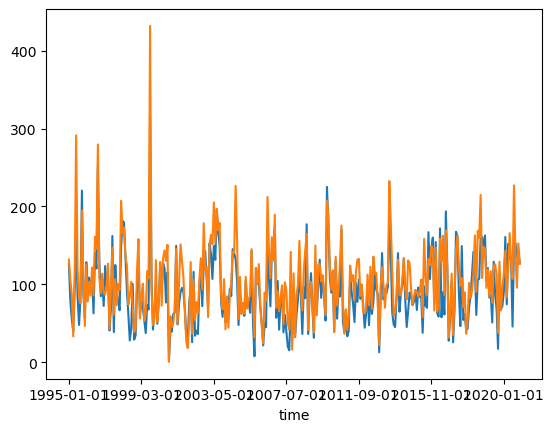

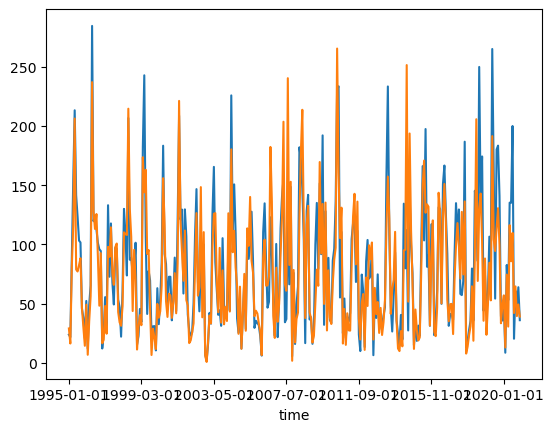

In [19]:
df_era5[df_era5['county_name']=='Halifax'].set_index('time')['precip_mm'].plot()
df_gpcp[df_gpcp['county_name']=='Halifax'].set_index('time')['precip_mm'].plot()
plt.show()

df_era5[df_era5['county_name']=='Page'].set_index('time')['precip_mm'].plot()
df_gpcp[df_gpcp['county_name']=='Page'].set_index('time')['precip_mm'].plot()
plt.show()

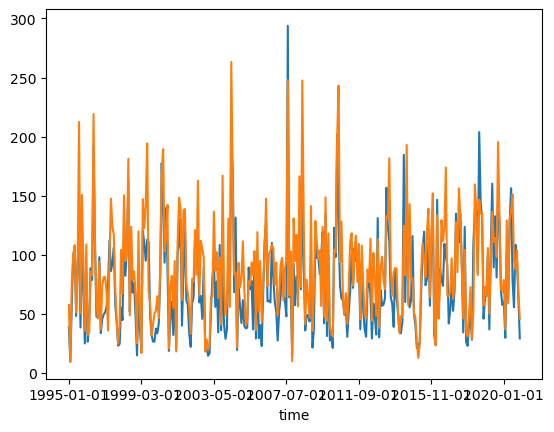

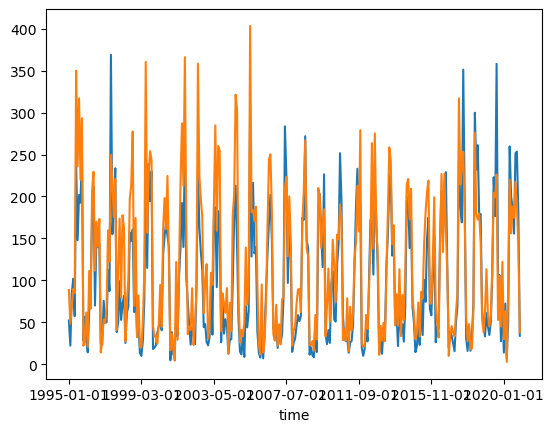

In [21]:
df_era5[df_era5['county_name']=='Columbia'].set_index('time')['precip_mm'].plot()
df_gpcp[df_gpcp['county_name']=='Columbia'].set_index('time')['precip_mm'].plot()
plt.show()

df_era5[df_era5['county_name']=='Miami-Dade'].set_index('time')['precip_mm'].plot()
df_gpcp[df_gpcp['county_name']=='Miami-Dade'].set_index('time')['precip_mm'].plot()
plt.show()

In [20]:
df_gpcp.county_name.unique()

array(['Halifax', 'Bath', 'Lawrence', 'Randolph', 'Ashley', 'Lafayette',
       'St. Landry', 'St. Martin', 'Tangipahoa', 'Lafourche',
       'Evangeline', 'Livingston', 'Jefferson', 'Madison', 'Concordia',
       'Plaquemines', 'Coos', 'Hunterdon', 'Stoddard', 'Perry', 'Butte',
       'Miami-Dade', 'Taylor', 'Wayne', 'Montgomery', 'Cameron', 'Jasper',
       'Orange', 'Guadalupe', 'Nueces', 'Kanawha', 'Braxton',
       'Trempealeau', 'Ritchie', 'Wetzel', 'Sauk', 'Grant', 'Lincoln',
       'Walsh', 'Benson', 'Owen', 'Mono', 'Inyo', 'Adams', 'Alexander',
       'Knox', 'Gibson', 'Lake and Peninsula', 'Essex', 'Delaware',
       'Hardin', 'Daviess', 'Johnson', 'Bell', 'Owsley', 'Ottawa',
       'Chenango', 'Tipton', 'Grand', 'Shelby', 'Posey', 'Waldo',
       'Escambia', 'Citrus', 'Fort Bend', 'Starr', 'El Paso', 'Navarro',
       'Newton', 'Chambers', 'Caldwell', 'Buncombe', 'Swain', 'Gilmer',
       'San Jacinto', 'Brewster', 'Menifee', 'Crittenden', 'Magoffin',
       'Morgan', 'Sonom

In [22]:
df_compare = df_era5.merge(
    df_gpcp,
    on=["geoid", "time"],   # or ["county_state", "time"]
    suffixes=("_era5", "_gpcp"),
    how="inner",
)

In [23]:
df_compare

,time,geoid,county_name_era5,state_abbr_era5,county_state_era5,area_m2_era5,precip_mm_era5,precip_m3_era5,county_name_gpcp,state_abbr_gpcp,county_state_gpcp,area_m2_gpcp,precip_mm_gpcp,precip_m3_gpcp
0,1995-01-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,125.930570,2.706244e+08,Halifax,VA,"Halifax, VA",2.148997e+09,131.805462,2.832495e+08
1,1995-02-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,78.937497,1.696364e+08,Halifax,VA,"Halifax, VA",2.148997e+09,105.898232,2.275749e+08
2,1995-03-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,55.083646,1.183746e+08,Halifax,VA,"Halifax, VA",2.148997e+09,87.146295,1.872771e+08
3,1995-04-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,40.058145,8.608482e+07,Halifax,VA,"Halifax, VA",2.148997e+09,33.138796,7.121516e+07
4,1995-05-01,51083,Halifax,VA,"Halifax, VA",2.148997e+09,93.408844,2.007353e+08,Halifax,VA,"Halifax, VA",2.148997e+09,114.752603,2.466029e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187195,2020-08-01,19145,Page,IA,"Page, IA",1.386849e+09,20.292950,2.814325e+07,Page,IA,"Page, IA",1.386849e+09,42.013519,5.826639e+07
187196,2020-09-01,19145,Page,IA,"Page, IA",1.386849e+09,60.723048,8.421368e+07,Page,IA,"Page, IA",1.386849e+09,64.487352,8.943420e+07
187197,2020-10-01,19145,Page,IA,"Page, IA",1.386849e+09,45.866141,6.360940e+07,Page,IA,"Page, IA",1.386849e+09,39.449812,5.471092e+07
187198,2020-11-01,19145,Page,IA,"Page, IA",1.386849e+09,63.796624,8.847626e+07,Page,IA,"Page, IA",1.386849e+09,49.221163,6.826230e+07


In [24]:
df_compare.to_csv(
    "/glade/derecho/scratch/molina/county_monthly_era5_gpcp_mmmonth_1995_2020.csv"
)